In [1]:
import sys
import pandas as pd
import numpy as np
import kmapper as km
import sklearn
from sklearn import ensemble
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.
/home/nina/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nina/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nina/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/nina/.local/lib/python3.6/site-packages/tensorflow/python/framewo

In [2]:
from keras.layers import Input, Dense
from keras.models import Model

In [3]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
df = pd.read_csv('../data/cat-reference.csv')

In [5]:
df.head()

,.013579,.215377,-.170891
0,0.010493,0.226649,-0.173601
1,0.020415,0.230665,-0.175927
2,0.060064,0.241075,-0.140388
3,0.057849,0.251924,-0.140969
4,0.060421,0.253476,-0.126477


In [6]:
df.shape

(7206, 3)

In [7]:
first_row = df.columns
first_row = [float(first_row[0]), float(first_row[1]), float(first_row[2])]
first_row

[0.013579, 0.215377, -0.170891]

In [8]:
df.columns = ['x', 'y', 'z']
df.head()

,x,y,z
0,0.010493,0.226649,-0.173601
1,0.020415,0.230665,-0.175927
2,0.060064,0.241075,-0.140388
3,0.057849,0.251924,-0.140969
4,0.060421,0.253476,-0.126477


In [9]:
df.shape

(7206, 3)

In [10]:
df.loc[7206] = first_row

In [11]:
df.shape

(7207, 3)

In [12]:
data = np.genfromtxt('../data/cat-reference.csv', delimiter=',')

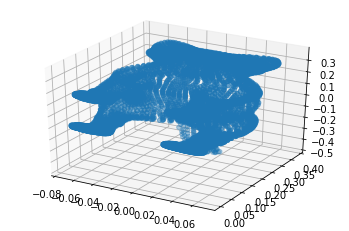

In [13]:
# iscrtavanje pocetnih tacaka 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0],data[:,1],data[:,2])
plt.savefig("cat-reference.csv.png")
plt.show()

# Autoencoder koji smanjuje na 2 dimenzije i koristi 3 sloja

In [57]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

In [58]:
input_dim = df.shape[1]
input_dim

3

In [59]:
encoding_dim = 2

In [60]:
input_layer = Input(shape=(input_dim, ))
encoder_layer_1 = Dense(8, activation="sigmoid", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder_layer_2 = Dense(6, activation="sigmoid")(encoder_layer_1)
encoder_layer_3 = Dense(encoding_dim, activation="sigmoid")(encoder_layer_2)

In [61]:
encoder = Model(inputs=input_layer, outputs=encoder_layer_3)

In [62]:
encoded_data = pd.DataFrame(encoder.predict(df))
encoded_data.columns = ['factor_1', 'factor_2']

In [63]:
encoded_data

,factor_1,factor_2
0,0.207236,0.397327
1,0.207160,0.397337
2,0.206274,0.396915
3,0.206241,0.397027
4,0.206013,0.396896
5,0.206031,0.396785
6,0.207055,0.397169
7,0.207070,0.397320
8,0.206874,0.397270
9,0.206873,0.397134


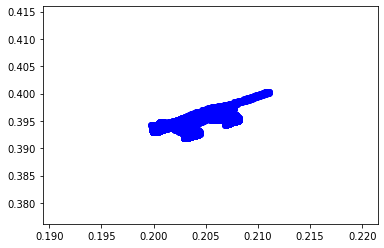

In [64]:
plt.scatter(
    encoded_data['factor_1'], 
    encoded_data['factor_2'], 
    c='b', marker='o')

# SOM na 2 dimenzije

In [22]:
import matplotlib.pyplot as plt
from minisom import MiniSom

som = MiniSom(10, 10, 3, sigma=0.3, learning_rate=0.5) # initialization of 6x6 SOM
som.train_random(df.values, 200)

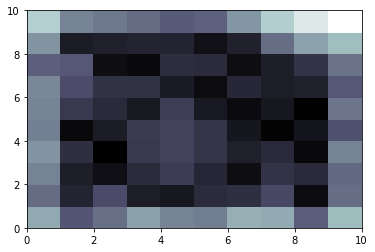

In [23]:
plt.pcolor(som.distance_map().T, cmap='bone_r')

# Mapper algoritam na 2 dimenzije 

In [24]:
mapper = km.KeplerMapper(verbose=2)

KeplerMapper()


In [25]:
lens = mapper.fit_transform(data)

..Composing projection pipeline of length 1:
	Projections: sum
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (7207, 3)

..Projecting data using: sum

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))



In [26]:
graph = mapper.map(lens,
                   data,
                   clusterer=sklearn.cluster.DBSCAN(eps=0.1, min_samples=5),
                   cover=km.Cover(n_cubes=10, perc_overlap=0.2))

Mapping on data shaped (7207, 3) using lens shaped (7207, 1)

Minimal points in hypercube before clustering: 5
Creating 10 hypercubes.
   > Found 2 clusters.

   > Found 2 clusters.

   > Found 1 clusters.

   > Found 2 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.


Created 12 edges and 13 nodes in 0:00:00.335474.


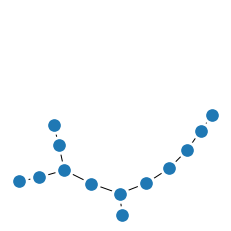

In [27]:
km.draw_matplotlib(graph)
plt.show()